## Stock Market Prediction And Forecasting Using Stacked LSTM(Long Short Term Memory)
![a.png](https://analyticsinsight.b-cdn.net/wp-content/uploads/2021/01/stock-market-1024x576.jpg)
- Investment in stock market is a subject to market risk. ;)
- This project is only for the purpose of learing.
- Please don't use it in realtime trading.


In [1]:
### Data Collection
import pandas_datareader as pdr
key="ab4633aaf571f3d328ab87f2a9dc2fc27360b4fe"

In [2]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [3]:
df.to_csv('AAPL.csv')

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('AAPL.csv')

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1257 non-null   object 
 1   date         1257 non-null   object 
 2   close        1257 non-null   float64
 3   high         1257 non-null   float64
 4   low          1257 non-null   float64
 5   open         1257 non-null   float64
 6   volume       1257 non-null   int64  
 7   adjClose     1257 non-null   float64
 8   adjHigh      1257 non-null   float64
 9   adjLow       1257 non-null   float64
 10  adjOpen      1257 non-null   float64
 11  adjVolume    1257 non-null   int64  
 12  divCash      1257 non-null   float64
 13  splitFactor  1257 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.6+ KB


In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-06-29 00:00:00+00:00,94.40,94.550,93.63,93.97,36531006,22.043669,22.078696,21.863864,21.943259,146124024,0.0,1.0
1,AAPL,2016-06-30 00:00:00+00:00,95.60,95.770,94.30,94.44,35836356,22.323886,22.363583,22.020318,22.053010,143345424,0.0,1.0
2,AAPL,2016-07-01 00:00:00+00:00,95.89,96.465,95.33,95.49,26026540,22.391605,22.525875,22.260837,22.298199,104106160,0.0,1.0
3,AAPL,2016-07-05 00:00:00+00:00,94.99,95.400,94.46,95.39,27705210,22.181442,22.277183,22.057680,22.274848,110820840,0.0,1.0
4,AAPL,2016-07-06 00:00:00+00:00,95.53,95.660,94.37,94.60,30949090,22.307540,22.337896,22.036664,22.090372,123796360,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-06-21 00:00:00+00:00,132.30,132.41,129.21,130.30,79663316,132.30,132.41,129.21,130.30,79663316,0.0,1.0
1253,AAPL,2021-06-22 00:00:00+00:00,133.98,134.08,131.62,132.13,74783618,133.98,134.08,131.62,132.13,74783618,0.0,1.0
1254,AAPL,2021-06-23 00:00:00+00:00,133.70,134.32,133.23,133.77,60214200,133.70,134.32,133.23,133.77,60214200,0.0,1.0
1255,AAPL,2021-06-24 00:00:00+00:00,133.41,134.64,132.93,134.45,68710998,133.41,134.64,132.93,134.45,68710998,0.0,1.0
1256,AAPL,2021-06-25 00:00:00+00:00,133.11,133.89,132.81,133.46,70783746,133.11,133.89,132.81,133.46,70783746,0.0,1.0


In [8]:
df1=df.reset_index()['close']

In [9]:
df1

0        94.40
1        95.60
2        95.89
3        94.99
4        95.53
         ...  
1252    132.30
1253    133.98
1254    133.70
1255    133.41
1256    133.11
Name: close, Length: 1257, dtype: float64

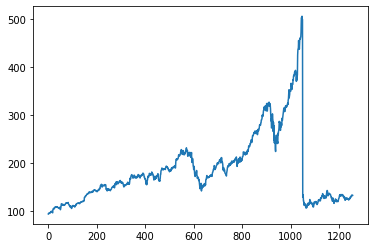

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [12]:
import numpy as np

In [13]:
df1

0        94.40
1        95.60
2        95.89
3        94.99
4        95.53
         ...  
1252    132.30
1253    133.98
1254    133.70
1255    133.41
1256    133.11
Name: close, Length: 1257, dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
print(df1)

[[0.        ]
 [0.00291481]
 [0.00361923]
 ...
 [0.09546018]
 [0.09475576]
 [0.09402706]]


In [16]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
training_size,test_size

(817, 440)

In [18]:
train_data

array([[0.        ],
       [0.00291481],
       [0.00361923],
       [0.00143312],
       [0.00274478],
       [0.00374068],
       [0.00553815],
       [0.00626685],
       [0.00733562],
       [0.00599966],
       [0.01066336],
       [0.01063907],
       [0.01318954],
       [0.0132867 ],
       [0.01350531],
       [0.01221793],
       [0.01034759],
       [0.0071413 ],
       [0.00551386],
       [0.02076805],
       [0.02414438],
       [0.02382861],
       [0.02829799],
       [0.02448444],
       [0.02766645],
       [0.02786077],
       [0.03177148],
       [0.0339333 ],
       [0.03500206],
       [0.03303456],
       [0.03286453],
       [0.03347179],
       [0.0366295 ],
       [0.0363866 ],
       [0.03599796],
       [0.0356579 ],
       [0.03633802],
       [0.03427336],
       [0.03509923],
       [0.03310744],
       [0.03199009],
       [0.03045981],
       [0.03016833],
       [0.02817654],
       [0.02841944],
       [0.02994972],
       [0.03237873],
       [0.032

In [19]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [22]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [24]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 257ms/step - loss: 0.0200 - val_loss: 0.0393
Epoch 2/100
12/12 [==============================] - 2s 127ms/step - loss: 0.0025 - val_loss: 0.0258
Epoch 3/100
12/12 [==============================] - 1s 114ms/step - loss: 0.0014 - val_loss: 0.0246
Epoch 4/100
12/12 [==============================] - 1s 106ms/step - loss: 7.3693e-04 - val_loss: 0.0203
Epoch 5/100
12/12 [==============================] - 2s 140ms/step - loss: 4.5473e-04 - val_loss: 0.0198
Epoch 6/100
12/12 [==============================] - 1s 109ms/step - loss: 4.7439e-04 - val_loss: 0.0193
Epoch 7/100
12/12 [==============================] - 2s 138ms/step - loss: 4.1044e-04 - val_loss: 0.0188
Epoch 8/100
12/12 [==============================] - 2s 146ms/step - loss: 3.6992e-04 - val_loss: 0.0183
Epoch 9/100
12/12 [==============================] - 2s 145ms/step - loss: 3.6150e-04 - val_loss: 0.0180
Epoch 10/100
12/12 [==============================] - 2s 129ms/step

In [29]:
import tensorflow as tf

In [30]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [31]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [32]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

176.62923363727944

In [33]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

224.72882763747057

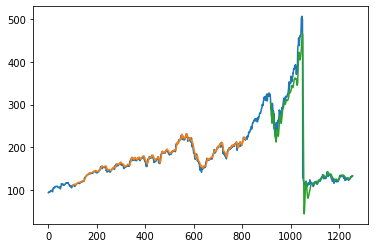

In [34]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
len(test_data)

440

In [36]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 99)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [38]:
temp_input

[0.10442323107192303,
 0.10289295343583765,
 0.10325730525395321,
 0.1010711943452598,
 0.09956520683038206,
 0.09893366367898176,
 0.09951662658796667,
 0.09422138016468701,
 0.0885132016808764,
 0.08576841798440576,
 0.08615705992372902,
 0.07675678301634725,
 0.07641672131943938,
 0.07517792513784644,
 0.0645874322912871,
 0.0652432655638952,
 0.08110471471252645,
 0.07461925235006922,
 0.06718647526051158,
 0.062498481867424516,
 0.06563190750321846,
 0.05334110617211979,
 0.06481818844276033,
 0.062134130049308955,
 0.06694357404843448,
 0.06468459277611793,
 0.07187446865359859,
 0.07571230780441596,
 0.07374480798659189,
 0.06347008671573273,
 0.06215842017051665,
 0.07041706138113629,
 0.0683524010784814,
 0.06240132138259369,
 0.06361582744297894,
 0.06512181495785663,
 0.06555903713959532,
 0.0619398090796473,
 0.06740508635138093,
 0.06946974665403582,
 0.07651388180427021,
 0.07726687556170903,
 0.08137190604581118,
 0.08734727586290658,
 0.0937477228011368,
 0.089484806529

In [95]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<40):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

2445 0.31655258 0.31888551 0.32122251
 0.32356295 0.32590598 0.3282508  0.3305966  0.33294228 0.335287
 0.3376298  0.33996943 0.34230477 0.34463477 0.34695795 0.34927309
 0.35157874 0.35387361 0.35615587 0.35842407 0.36067641 0.36291116
 0.36512634 0.36732003 0.36949015 0.37163448 0.37375063 0.37583634
 0.37788901 0.37990594 0.38188425 0.38382113 0.3857134  0.38755772
 0.3893508  0.39108896 0.39276832 0.39438498 0.39593473 0.3974131
 0.39881554 0.40013713 0.40137249 0.40251669 0.40356377 0.40450785
 0.40534288 0.40606219 0.40665928 0.40712684]
23 day output [[0.4074577]]
24 day input [0.21302254 0.21478616 0.21656291 0.21835276 0.22015561 0.22197144
 0.22380027 0.22564209 0.22749685 0.22936457 0.23124532 0.23313895
 0.23504567 0.2369653  0.23889799 0.24084364 0.24280231 0.24477394
 0.2467586  0.2487562  0.25076672 0.25279018 0.25482661 0.25687584
 0.25893787 0.26101267 0.26310015 0.26520017 0.26731274 0.2694377
 0.27157485 0.27372432 0.27588555 0.27805877 0.28024361 0.28243989
 0.28464

In [96]:
day_new=np.arange(1,101)
day_pred=np.arange(101,141)

In [97]:
import matplotlib.pyplot as plt

In [98]:
len(df1)

1257

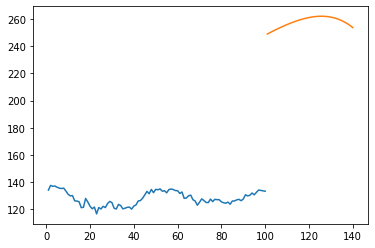

In [99]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

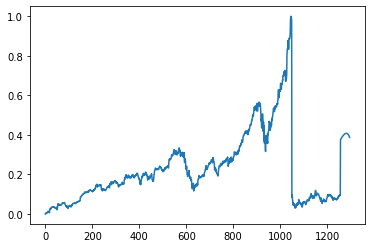

In [111]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[0:])

In [112]:
df3=scaler.inverse_transform(df3).tolist()

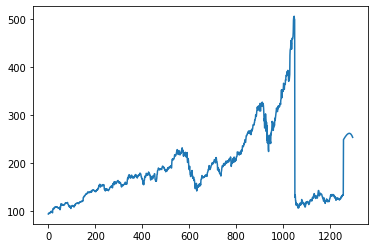

In [113]:
plt.plot(df3)